In [1]:
import tensorflow as tf
import os
import random
import shutil
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model


In [2]:
data_dir = "leaf_images"

In [3]:
# Set the ratio for splitting the data
split_ratio = [0.6, 0.2, 0.2]

# Define the classes in the dataset
classes = ['Pepper__bell', 'Potato', 'Tomato']

# Create directories for train, validation, and test sets
for cls in classes:
    os.makedirs(os.path.join('data', 'train', cls))
    os.makedirs(os.path.join('data', 'val', cls))
    os.makedirs(os.path.join('data', 'test', cls))

# Split the data and copy images to appropriate directories
for cls in classes:
    src = os.path.join(data_dir, cls)
    all_files = os.listdir(src)
    np.random.shuffle(all_files)
    split_index1 = int(split_ratio[0] * len(all_files))
    split_index2 = int((split_ratio[0] + split_ratio[1]) * len(all_files))
    train_files = all_files[:split_index1]
    val_files = all_files[split_index1:split_index2]
    test_files = all_files[split_index2:]
    for file_name in train_files:
        shutil.copy(os.path.join(src, file_name), os.path.join('data', 'train', cls))
    for file_name in val_files:
        shutil.copy(os.path.join(src, file_name), os.path.join('data', 'val', cls))
    for file_name in test_files:
        shutil.copy(os.path.join(src, file_name), os.path.join('data', 'test', cls))


In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('data/train',
                                                    target_size=(224, 224),
                                                    batch_size=32,
                                                    class_mode='categorical')

val_generator = val_datagen.flow_from_directory('data/val',
                                                target_size=(224, 224),
                                                batch_size=32,
                                                class_mode='categorical')

test_generator = test_datagen.flow_from_directory('data/test',
                                                  target_size=(224, 224),
                                                  batch_size=32,
                                                  class_mode='categorical')


Found 1931 images belonging to 3 classes.
Found 644 images belonging to 3 classes.
Found 646 images belonging to 3 classes.


In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

# Define the model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])




In [28]:
# Train the model
history = model.fit(train_generator,
                    epochs=5,
                    validation_data=val_generator)

Epoch 1/5
61/61 [==============================] - 96s 2s/step - loss: 0.6753 - accuracy: 0.7297 - val_loss: 0.4193 - val_accuracy: 0.8944
Epoch 2/5
61/61 [==============================] - 83s 1s/step - loss: 0.3384 - accuracy: 0.9083 - val_loss: 0.1494 - val_accuracy: 0.9503
Epoch 3/5
61/61 [==============================] - 80s 1s/step - loss: 0.2863 - accuracy: 0.9161 - val_loss: 0.1497 - val_accuracy: 0.9488
Epoch 4/5
61/61 [==============================] - 73s 1s/step - loss: 0.2322 - accuracy: 0.9285 - val_loss: 0.1565 - val_accuracy: 0.9488
Epoch 5/5
61/61 [==============================] - 73s 1s/step - loss: 0.2666 - accuracy: 0.9213 - val_loss: 0.1207 - val_accuracy: 0.9503


In [29]:
test_loss, test_acc = model.evaluate(test_generator)
print('Test accuracy:', test_acc)


21/21 [==============================] - 11s 542ms/step - loss: 0.1167 - accuracy: 0.9505
Test accuracy: 0.9504643678665161


In [56]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

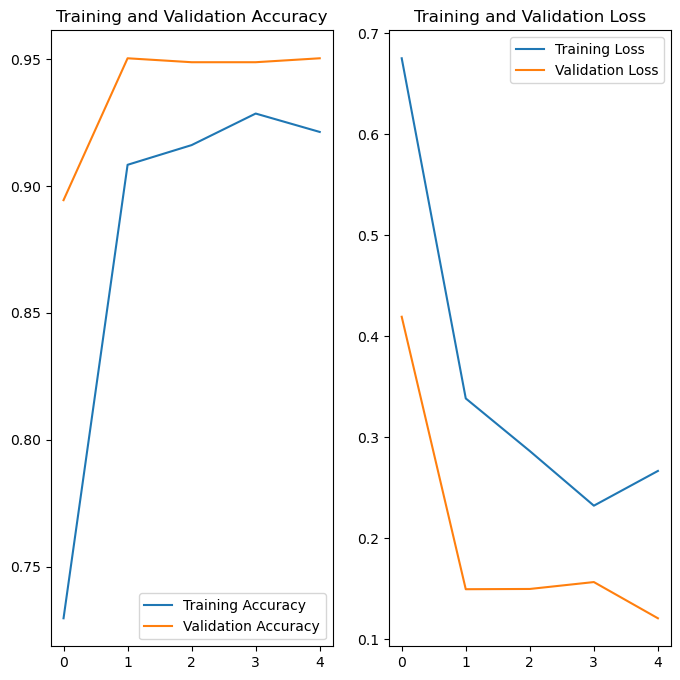

In [59]:
EPOCHS=5
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label='Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label='Training Loss')
plt.plot(range(EPOCHS), val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [44]:
 #Saving our model
 filepath="leaf_classifier_model.h5"
 model.save(filepath)

In [38]:
from tensorflow.keras.preprocessing.image import load_img,img_to_array
import matplotlib.pyplot as plt
from keras.preprocessing import image
import numpy as np

img_path = 'img11.jpg'
img = load_img(img_path, target_size=(224, 224))
img_array = img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
predictions = model.predict(img_array)
print(predictions)
print("predicted label:",classes[np.argmax(predictions[0])])


1/1 [==============================] - 0s 30ms/step
[[0. 0. 1.]]
predicted label: Tomato


Following is our prediction:
1/1 [==============================] - 0s 31ms/step


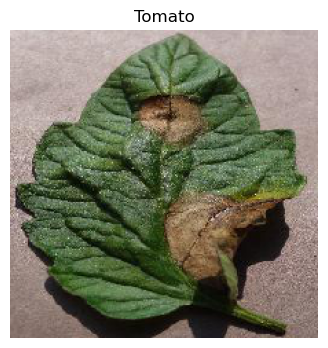

In [69]:
# predicting an image
image_path ="t_d.jpg"


new_img = load_img(image_path, target_size=(224, 224))
img = img_to_array(new_img)
img = np.expand_dims(img, axis=0)
img = img/255

print("Following is our prediction:")
prediction = model.predict(img)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
d = prediction.flatten()
j = d.max()
for index,item in enumerate(d):
    if item == j:
        class_name = classes[index]

     
        
##Another way
img_class = model.predict(img)
#img_prob = classifier.predict_proba(img)


# convert the predicted outputs to probabilities
img_prob = np.exp(img_class) / np.sum(np.exp(img_class), axis=-1, keepdims=True)


#ploting image with predicted class name        
plt.figure(figsize = (4,4))
plt.imshow(new_img)
plt.axis('off')
plt.title(class_name)
plt.show()

In [48]:
print(img_prob)
#probability
print(img_prob.max())

[[0.30009094 0.26512307 0.43478605]]
0.43478605


In [55]:
 confidence = round(100 * (np.max(img_prob[0])), 2)
 print(confidence)

43.48


In [64]:
#there is some worng here
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory('trail_dataset',
                                                  target_size=(224, 224),
                                                  batch_size=1,
                                                  class_mode='categorical',
                                                  shuffle=False)


Found 0 images belonging to 0 classes.


In [75]:
import numpy as np
from tensorflow.keras.preprocessing import image



# Load the test images and make predictions
test_images = []
image_names = []

for filename in os.listdir('trail_dataset'):
    img = image.load_img('trail_dataset/'+filename, target_size=(224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img/255.0  # Normalize the image


In [76]:
test_images

[]

In [95]:
'''def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence'''

def predict(model, img):
    img_array = img
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = classes[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence


1/1 [==============================] - 0s 62ms/step


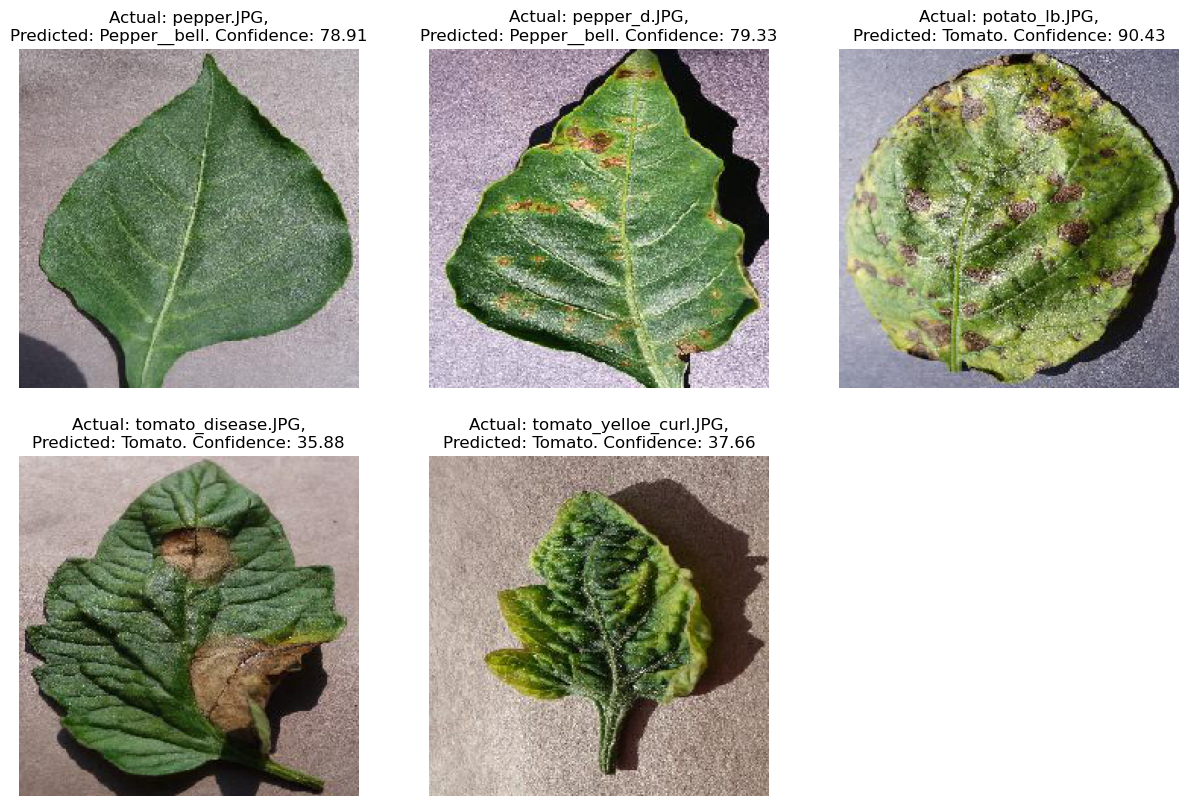

In [102]:
'''
for i in os.listdir('trail_dataset'):
    ax = plt.subplot(3, 3, i + 1)
    img = image.load_img('trail_dataset/'+i, target_size=(224, 224))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img/255.0  # Normalize the image
    
    plt.imshow(img[i].numpy().astype("uint8"))
        
    predicted_class, confidence = predict(model, img.numpy())
    actual_class = i
        
    plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
    plt.axis("off")
'''


fig = plt.figure(figsize=(15, 15))

for i, filename in enumerate(os.listdir('trail_dataset')):
    ax = fig.add_subplot(3, 3, i+1)
    img = image.load_img(os.path.join('trail_dataset', filename), target_size=(224, 224))
    img = image.img_to_array(img)
    img = img/255.0  # Normalize the image
    
    ax.imshow(img)
        
    predicted_class, confidence = predict(model, img)
    actual_class = filename
        
    ax.set_title(f"Actual: {actual_class},\nPredicted: {predicted_class}. Confidence: {confidence:.2f}")
    ax.axis("off")


plt.show()
